In [1]:
import pandas as pd
import numpy as np

In [2]:
from src.trade_simulation import getEnvironment

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [4]:
data=pd.read_csv('../data/simulation_results',parse_dates=['date'])

In [5]:
data

,date,current_capital,unclaimed_fees,projected_fees_on_reinvest,reinvest_cost,fit_p_value,projection_p_value,day_projection,test_size
0,2022-02-24,1.000000e+06,101.056567,-0.021130,166.441363,0.02,0.02,7,0.3
1,2022-02-25,1.000000e+06,146.983887,0.004703,132.462342,0.02,0.02,7,0.3
2,2022-02-26,1.000000e+06,185.571526,0.024992,108.350535,0.02,0.02,7,0.3
3,2022-02-27,1.000000e+06,205.172566,0.038585,85.742433,0.02,0.02,7,0.3
4,2022-02-28,1.000000e+06,262.102024,0.034999,151.682107,0.02,0.02,7,0.3
...,...,...,...,...,...,...,...,...,...
21775,2022-10-19,1.026282e+06,2312.223434,11.620175,29.802768,0.02,0.20,63,0.3
21776,2022-10-20,1.026282e+06,2378.581647,11.939198,31.753354,0.02,0.20,63,0.3
21777,2022-10-21,1.026282e+06,2424.544728,12.167550,31.245179,0.02,0.20,63,0.3
21778,2022-10-22,1.026282e+06,2440.888065,12.295714,20.143944,0.02,0.20,63,0.3


In [6]:
def annualized_return(df):
    row=df[df.date==df.date.max()].iloc[0]
    return ((row.current_capital+row.unclaimed_fees)/1000000-1)*365/len(data.date.unique())

def reinvestment_count(df):
    return (df.unclaimed_fees>df.unclaimed_fees.shift(-1)).sum()

def processResults(df):
    return pd.Series([annualized_return(df),reinvestment_count(df)],index=['annualized_return','reinvestment_count'])

In [7]:
result_df=data.groupby(['projection_p_value','day_projection']).apply(processResults).reset_index()

In [8]:
result_df.sort_values('annualized_return',ascending=False)

,projection_p_value,day_projection,annualized_return,reinvestment_count
4,0.02,35,0.043431,3.0
22,0.06,35,0.043431,3.0
13,0.04,35,0.043431,3.0
40,0.10,35,0.043428,3.0
85,0.20,35,0.043428,3.0
...,...,...,...,...
36,0.10,7,0.043204,1.0
27,0.08,7,0.043204,1.0
18,0.06,7,0.043204,1.0
9,0.04,7,0.043187,1.0


In [9]:
def base_case():
    env=getEnvironment()
    start_index=int(len(env)*.3)
    test_env=env.iloc[start_index:].reset_index(drop=True)
    test_env['tvlUSD']=test_env.tvlUSD+1000000
    test_env['returns']=test_env.feesUSD/test_env.tvlUSD
    return test_env

In [10]:
no_strategy=base_case()

In [11]:
no_strat_returns=no_strategy.returns.sum()*365/len(no_strategy)
no_strat_returns

0.043104839772129096

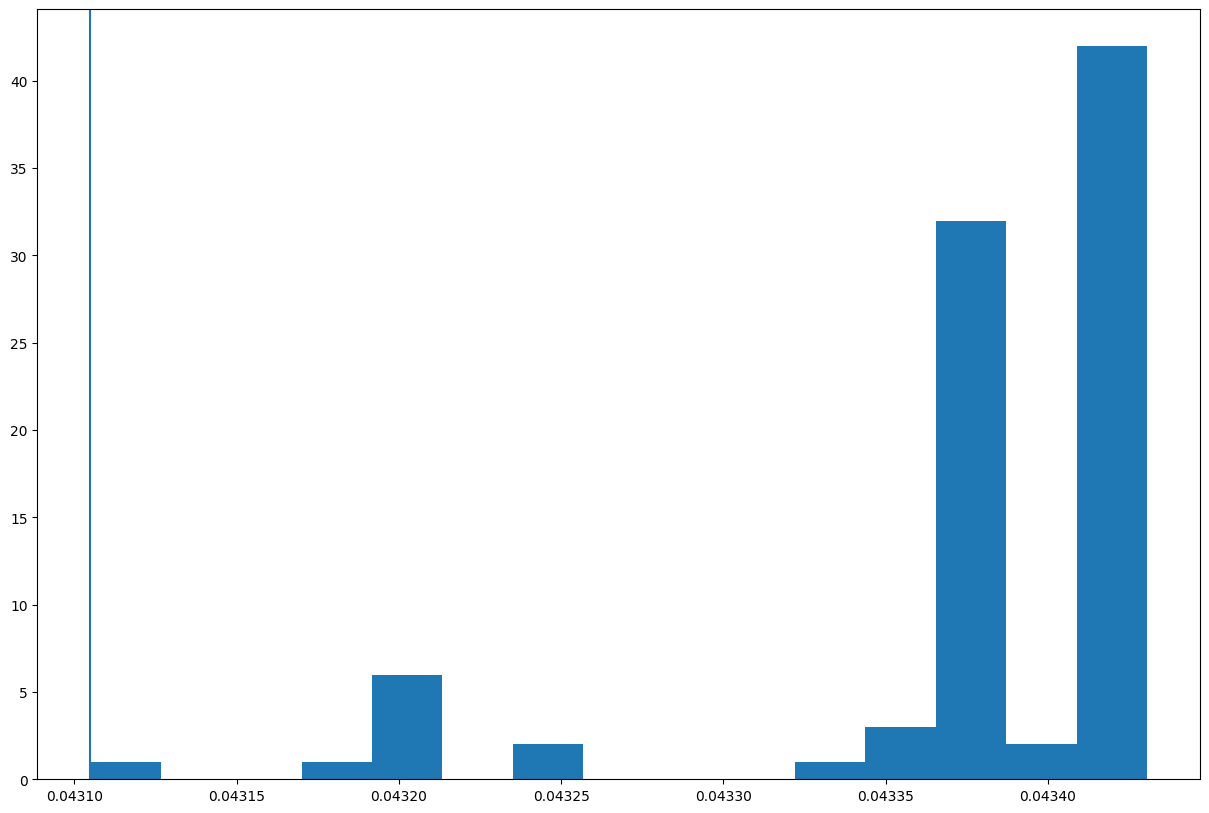

In [12]:
plt.hist(result_df.annualized_return,bins=15)
_=plt.axvline(no_strat_returns)

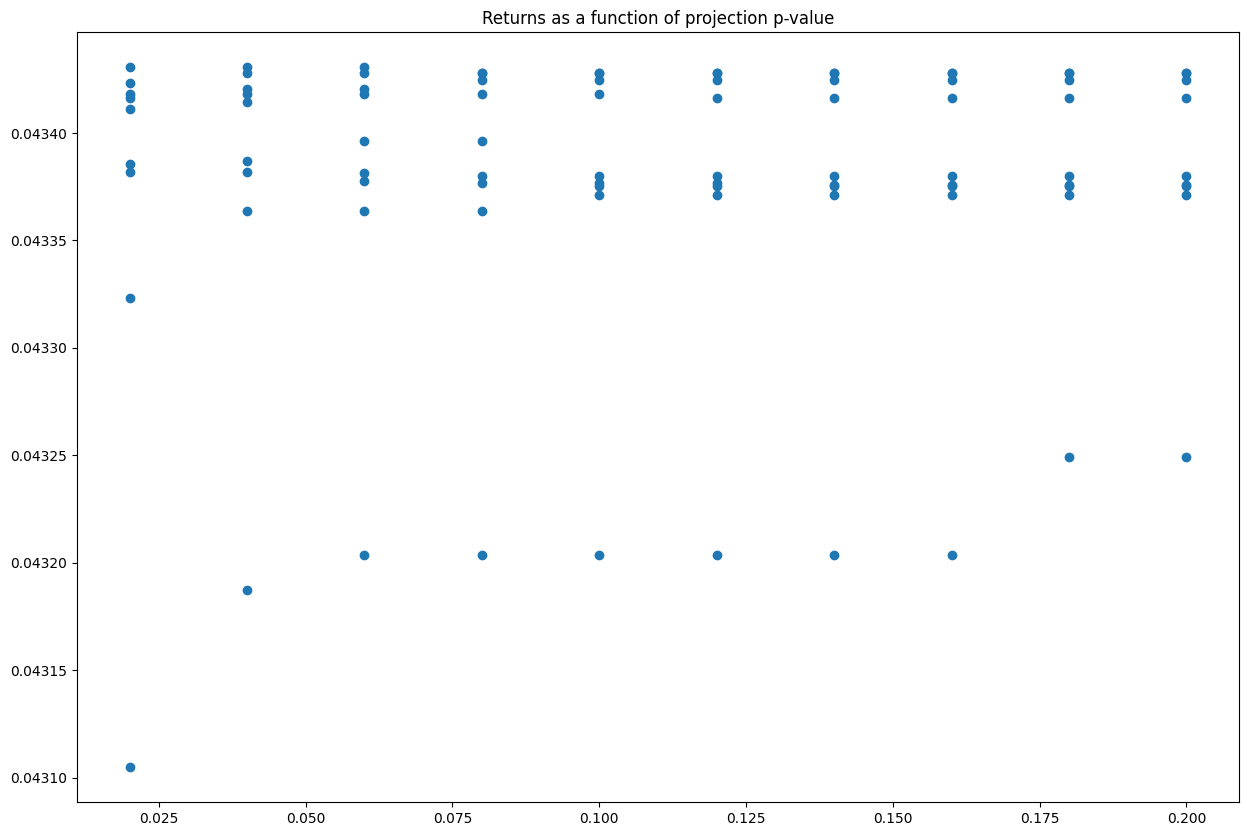

In [13]:
plt.scatter(result_df.projection_p_value,result_df.annualized_return)
_=plt.title('Returns as a function of projection p-value')

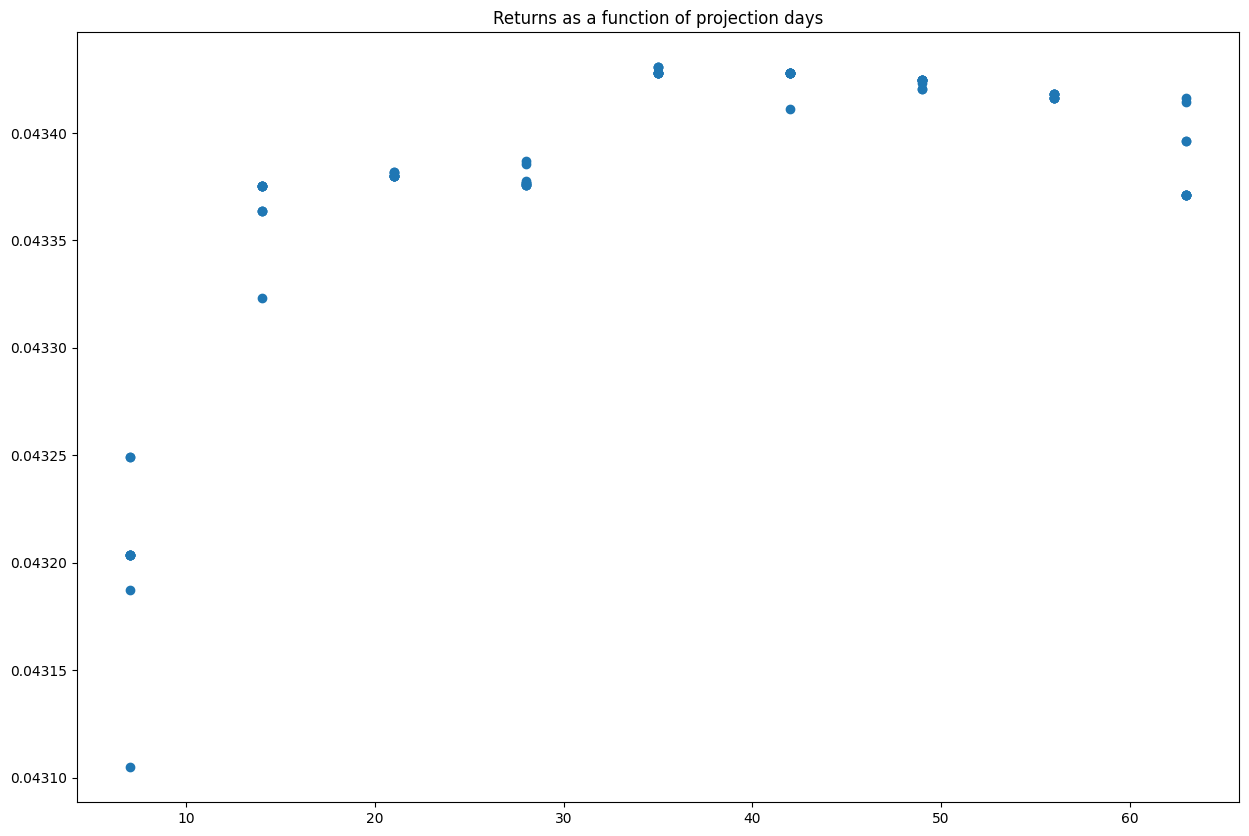

In [14]:
plt.scatter(result_df.day_projection,result_df.annualized_return)
_=plt.title('Returns as a function of projection days')

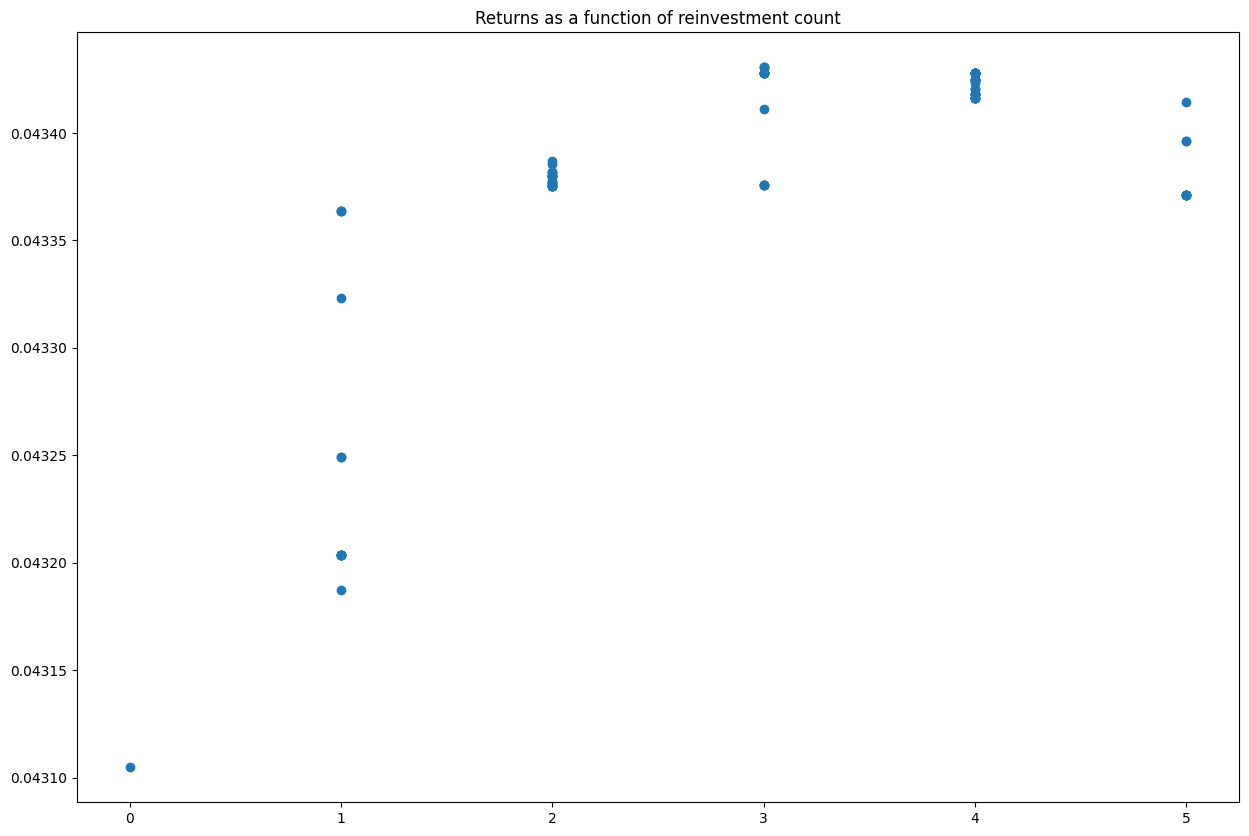

In [15]:
plt.scatter(result_df.reinvestment_count,result_df.annualized_return)
_=plt.title('Returns as a function of reinvestment count')

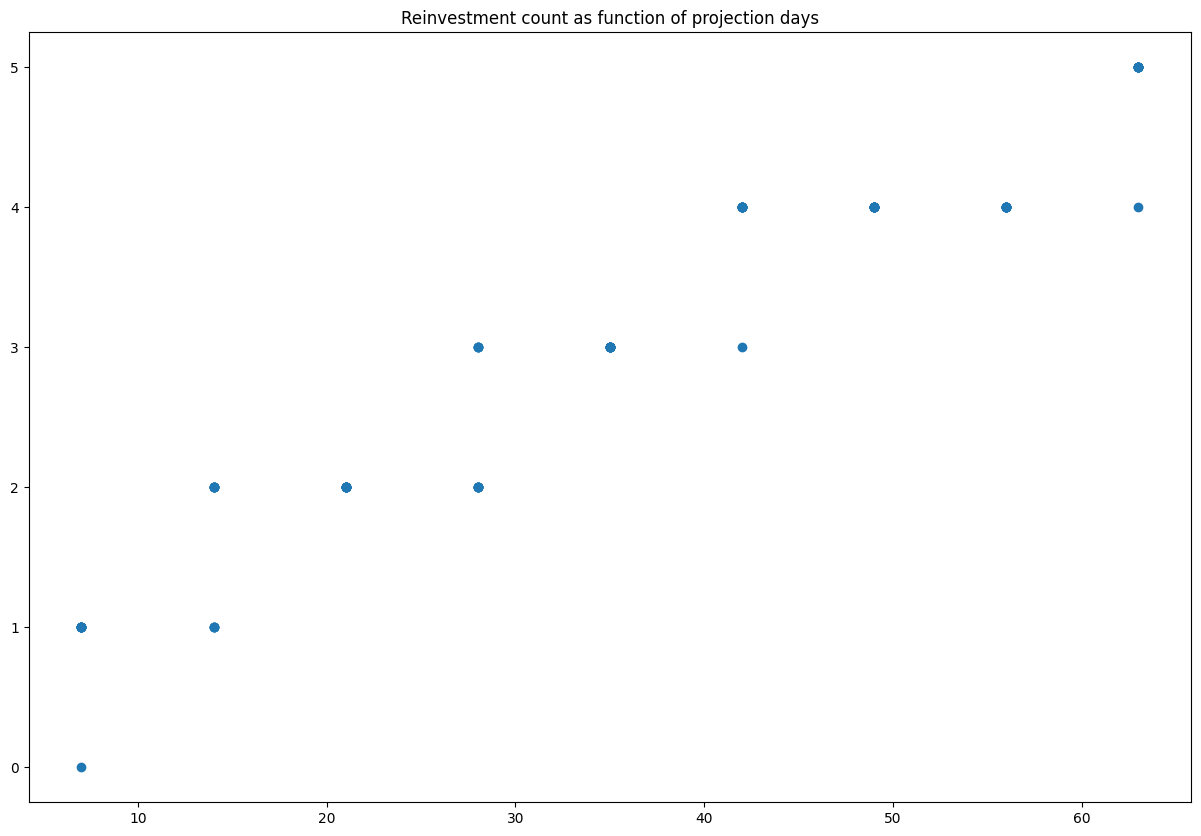

In [16]:
plt.scatter(result_df.day_projection,result_df.reinvestment_count)
_=plt.title('Reinvestment count as function of projection days')